In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,929 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and dire

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')

In [2]:
csvPath = '/content/drive/MyDrive/구글클라우드인공지능개발자과정/공공데이터포털/CARD_SUBWAY_MONTH_202309.csv'

In [7]:
import pandas as pd

df = pd.read_csv(csvPath, index_col=False)

In [8]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20230901,8호선,석촌,8717,10257,20230904
1,20230901,8호선,송파,10608,10097,20230904
2,20230901,8호선,가락시장,8858,9967,20230904
3,20230901,8호선,문정,23576,24374,20230904
4,20230901,8호선,장지,19342,17388,20230904


In [9]:
df['total'] = df['승차총승객수'] + df['하차총승객수']

In [10]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,total
0,20230901,8호선,석촌,8717,10257,20230904,18974
1,20230901,8호선,송파,10608,10097,20230904,20705
2,20230901,8호선,가락시장,8858,9967,20230904,18825
3,20230901,8호선,문정,23576,24374,20230904,47950
4,20230901,8호선,장지,19342,17388,20230904,36730


In [68]:
(df['노선명'].value_counts() / 30).sort_values(ascending = False)

5호선         56.000000
2호선         50.000000
7호선         42.033333
경부선         39.000000
6호선         37.900000
분당선         34.666667
3호선         33.733333
경원선         29.366667
경의선         27.066667
4호선         26.000000
9호선         25.000000
중앙선         21.000000
경인선         20.000000
경춘선         19.000000
8호선         18.000000
수인선         18.000000
공항철도 1호선    14.000000
우이신설선       13.000000
안산선         13.000000
9호선2~3단계    13.000000
신림선         11.000000
경강선         11.000000
일산선         10.300000
1호선         10.000000
과천선          8.000000
장항선          7.000000
서해선          3.000000
Name: 노선명, dtype: float64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18302 entries, 0 to 18301
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18302 non-null  int64 
 1   노선명     18302 non-null  object
 2   역명      18302 non-null  object
 3   승차총승객수  18302 non-null  int64 
 4   하차총승객수  18302 non-null  int64 
 5   등록일자    18302 non-null  int64 
 6   total   18302 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1001.0+ KB


In [61]:
date = pd.to_datetime(df['사용일자'].astype('str'))

문법이 틀리지 않았는데 안될 때는 칼럼의 데이터타입을 의심해 봐라.

In [63]:
df['요일'] = date.dt.weekday

In [64]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,total,요일
0,20230901,8호선,석촌,8717,10257,20230904,18974,4
1,20230901,8호선,송파,10608,10097,20230904,20705,4
2,20230901,8호선,가락시장,8858,9967,20230904,18825,4
3,20230901,8호선,문정,23576,24374,20230904,47950,4
4,20230901,8호선,장지,19342,17388,20230904,36730,4


### 5호선 역만 모아봐

In [14]:
line5_df = df[df['노선명'] == '5호선']

In [50]:
line5_df['역명'].unique()

array(['하남검단산', '하남시청(덕풍·신장)', '하남풍산', '미사', '강일', '마천', '거여', '개롱', '오금',
       '방이', '올림픽공원(한국체대)', '둔촌동', '상일동', '고덕', '명일', '굽은다리(강동구민회관앞)',
       '길동', '강동', '천호(풍납토성)', '광나루(장신대)', '아차산(어린이대공원후문)', '군자(능동)',
       '장한평', '답십리', '마장', '왕십리(성동구청)', '행당', '신금호', '청구',
       '동대문역사문화공원(DDP)', '을지로4가', '종로3가', '광화문(세종문화회관)', '서대문',
       '충정로(경기대입구)', '애오개', '공덕', '마포', '여의나루', '여의도', '신길', '영등포시장',
       '영등포구청', '양평', '오목교(목동운동장앞)', '목동', '신정(은행정)', '까치산', '화곡', '우장산',
       '발산', '마곡', '송정', '김포공항', '개화산', '방화'], dtype=object)

In [53]:
len(line5_df['역명'].unique())

56

In [49]:
line5_df['역명'].value_counts()

하남검단산             30
하남시청(덕풍·신장)       30
을지로4가             30
종로3가              30
광화문(세종문화회관)       30
서대문               30
충정로(경기대입구)        30
애오개               30
공덕                30
마포                30
여의나루              30
여의도               30
신길                30
영등포시장             30
영등포구청             30
양평                30
오목교(목동운동장앞)       30
목동                30
신정(은행정)           30
까치산               30
화곡                30
우장산               30
발산                30
마곡                30
송정                30
김포공항              30
개화산               30
동대문역사문화공원(DDP)    30
청구                30
신금호               30
고덕                30
하남풍산              30
미사                30
강일                30
마천                30
거여                30
개롱                30
오금                30
방이                30
올림픽공원(한국체대)       30
둔촌동               30
상일동               30
명일                30
행당                30
굽은다리(강동구민회관앞)     30
길동                30
강동                30
천호(풍납토성)     

<Axes: xlabel='역명', ylabel='total'>

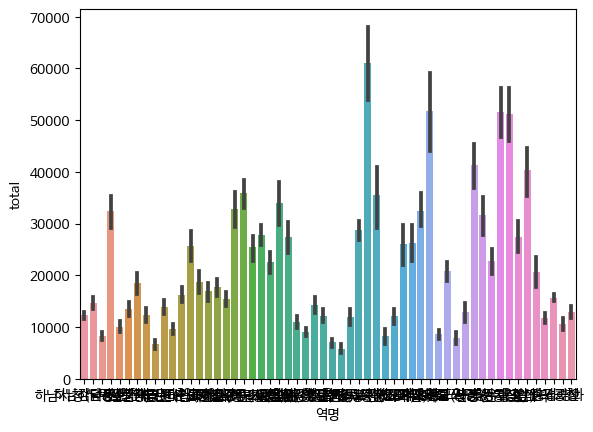

In [13]:
import seaborn as sns

sns.barplot(line5_df, x='역명', y='total')

In [23]:
line5_df.sort_values('total', ascending = False)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,total
15719,20230926,5호선,광화문(세종문화회관),43938,44108,20230929,88046
13022,20230922,5호선,광화문(세종문화회관),38225,40775,20230925,79000
12395,20230921,5호선,광화문(세종문화회관),37733,40226,20230924,77959
3732,20230907,5호선,광화문(세종문화회관),37567,39957,20230910,77524
7097,20230912,5호선,광화문(세종문화회관),37465,39890,20230915,77355
...,...,...,...,...,...,...,...
17228,20230929,5호선,동대문역사문화공원(DDP),851,1089,20231002,1940
17216,20230929,5호선,영등포구청,1030,896,20231002,1926
17837,20230930,5호선,충정로(경기대입구),943,954,20231003,1897
17248,20230929,5호선,오금,930,907,20231002,1837


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:75: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:148: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:137: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['사용일자'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['승차총승객수'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['하차총승객수'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['등록일자'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['사용일자', '승차총승객수'], ['승차총승객수', '하차총승객수'], ['하차총승객수', '등록일자'], ['등록일자', 'total']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['사용일자'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['승차총승객수'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['하차총승객수'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['등록일자'], **{})
chart

In [ ]:
df['total']

In [34]:
line5_top5_df = line5_df.groupby('역명').max('total').sort_values('total', ascending = False).head(5)

In [81]:
line5_top5_df.reset_index()

,역명,사용일자,승차총승객수,하차총승객수,등록일자,total
0,광화문(세종문화회관),20230930,43938,44108,20231003,88046
1,여의도,20230930,34957,35305,20231003,69796
2,여의나루,20230930,31216,34647,20231003,65863
3,화곡,20230930,33554,30687,20231003,64241
4,오목교(목동운동장앞),20230930,30832,33131,20231003,63963


열마다 각각의 최대값 말고, total 최대값이 있는 행을 통째로 불러오는 법...?

그룹바이 말고 다른 방법을 써야 할듯.

In [80]:
line5_top5_df.head()

,사용일자,승차총승객수,하차총승객수,등록일자,total
역명,,,,,
광화문(세종문화회관),20230930,43938,44108,20231003,88046
여의도,20230930,34957,35305,20231003,69796
여의나루,20230930,31216,34647,20231003,65863
화곡,20230930,33554,30687,20231003,64241
오목교(목동운동장앞),20230930,30832,33131,20231003,63963


[Text(0.5, 1.0, '서울 지하철 5호선 23년 9월 하루 승하차 최대인원 역 top5')]

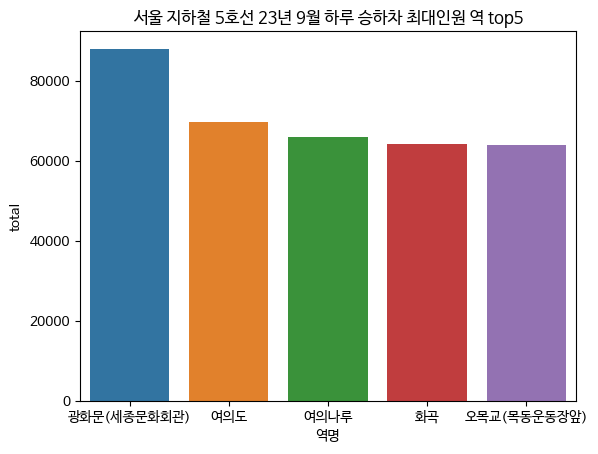

In [77]:
sns.barplot(line5_top5_df.reset_index(), x = '역명', y = 'total').set(title = '서울 지하철 5호선 23년 9월 하루 승하차 최대인원 역 top5')

## 전체 역 중 승하차 승차 하차 각각 탑5 시각화

In [82]:
df.groupby('역명').max('total').sort_values('total', ascending = False).head(5).reset_index()

,역명,사용일자,승차총승객수,하차총승객수,등록일자,total,요일
0,강남,20230930,93236,91978,20231003,185214,6
1,홍대입구,20230930,83054,96089,20231003,178899,6
2,잠실(송파구청),20230930,87055,87863,20231003,174918,6
3,구로디지털단지,20230930,66434,65598,20231003,132032,6
4,역삼,20230930,62596,69339,20231003,131372,6


[Text(0.5, 1.0, '서울 지하철 전체 노선 23년 9월 하루 승하차 최대인원 역 top5')]

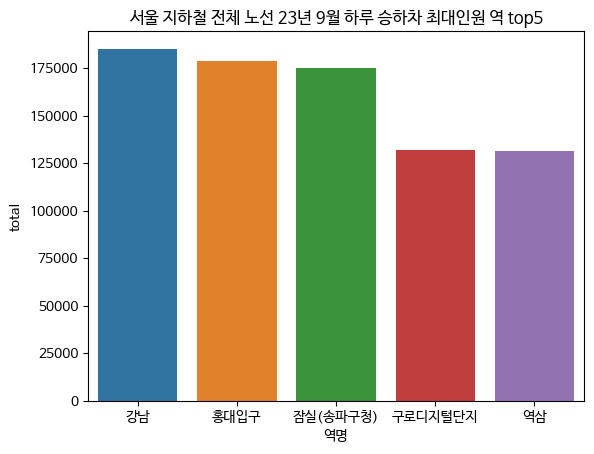

In [83]:
rideon_df = df.groupby('역명').max('total').sort_values('total', ascending = False).head(5).reset_index()
sns.barplot(rideon_df, x = '역명', y = 'total').set(title = '서울 지하철 전체 노선 23년 9월 하루 승하차 최대인원 역 top5')

이건 사실 같은 역은 노선별로 분리한 결과임!

즉, 단일역&단일노선으로는 강남역 2호선이 최대인원이라는 뜻!

확인 결과 top5 모두 2호선이었음.

In [41]:
df.groupby('역명').max('승차총승객수').sort_values('승차총승객수', ascending = False).head(5).reset_index()

,역명,사용일자,승차총승객수,하차총승객수,등록일자,total
0,강남,20230930,93236,91978,20231003,185214
1,잠실(송파구청),20230930,87055,87863,20231003,174918
2,홍대입구,20230930,83054,96089,20231003,178899
3,선릉,20230930,67514,59389,20231003,126829
4,구로디지털단지,20230930,66434,65598,20231003,132032


[Text(0.5, 1.0, '서울 지하철 전체 노선 23년 9월 하루 승차 최대인원 역 top5')]

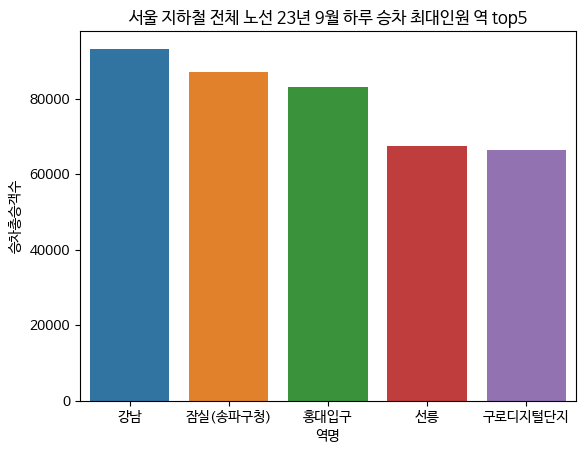

In [78]:
rideon_df = df.groupby('역명').max('승차총승객수').sort_values('승차총승객수', ascending = False).head(5).reset_index()
sns.barplot(rideon_df, x = '역명', y = '승차총승객수').set(title = '서울 지하철 전체 노선 23년 9월 하루 승차 최대인원 역 top5')

In [42]:
df.groupby('역명').max('하차총승객수').sort_values('하차총승객수', ascending = False).head(5).reset_index()

,역명,사용일자,승차총승객수,하차총승객수,등록일자,total
0,홍대입구,20230930,83054,96089,20231003,178899
1,강남,20230930,93236,91978,20231003,185214
2,잠실(송파구청),20230930,87055,87863,20231003,174918
3,고속터미널,20230930,60872,76527,20231003,127128
4,역삼,20230930,62596,69339,20231003,131372


[Text(0.5, 1.0, '서울 지하철 전체 노선 23년 9월 하루 하차 최대인원 역 top5')]

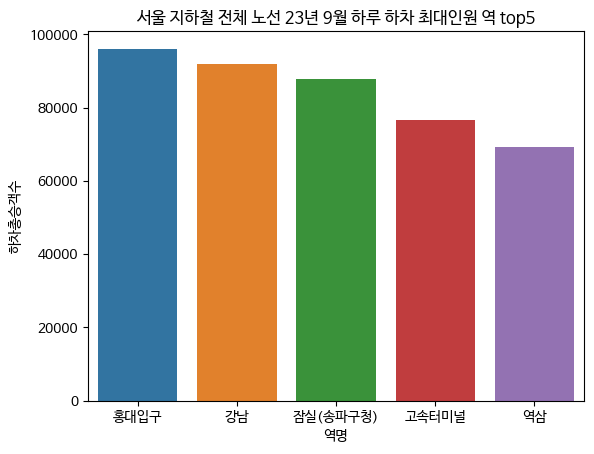

In [79]:
rideon_df = df.groupby('역명').max('하차총승객수').sort_values('하차총승객수', ascending = False).head(5).reset_index()
sns.barplot(rideon_df, x = '역명', y = '하차총승객수').set(title = '서울 지하철 전체 노선 23년 9월 하루 하차 최대인원 역 top5')

### 한 역에 여러 노선 통합한 결과 확인해볼 것

In [86]:
df[df['역명'] == '홍대입구']

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,total,요일
134,20230901,경의선,홍대입구,2331,2971,20230904,5302,4
197,20230901,공항철도 1호선,홍대입구,14656,15425,20230904,30081,4
547,20230901,2호선,홍대입구,71723,81971,20230904,153694,4
678,20230902,2호선,홍대입구,79471,92453,20230905,171924,5
1025,20230902,경의선,홍대입구,2540,3248,20230905,5788,5
...,...,...,...,...,...,...,...,...
17477,20230929,경의선,홍대입구,1068,1646,20231002,2714,4
17540,20230929,공항철도 1호선,홍대입구,8097,8399,20231002,16496,4
17744,20230930,2호선,홍대입구,52989,62358,20231003,115347,5
18092,20230930,경의선,홍대입구,1743,2457,20231003,4200,5


홍대입구는 3개 역으로 쪼개져 있음! 한 역에 노선이 여러 개 있는 경우는 하나로 합칠 수 없을까?

In [101]:
station_line_group_df = df.groupby(['역명', '사용일자', '노선명']).max('total').reset_index()

In [108]:
station_line_group_df[station_line_group_df['역명'] == '가락시장'].head()

,역명,사용일자,노선명,승차총승객수,하차총승객수,등록일자,total,요일
60,가락시장,20230901,3호선,10532,10274,20230904,20806,4
61,가락시장,20230901,8호선,8858,9967,20230904,18825,4
62,가락시장,20230902,3호선,7453,7075,20230905,14528,5
63,가락시장,20230902,8호선,6426,6649,20230905,13075,5
64,가락시장,20230903,3호선,4351,4477,20230906,8828,6


In [113]:
station_line_group_df2 = station_line_group_df.groupby(['역명', '사용일자']).sum('total').reset_index()

In [114]:
station_line_group_df2[station_line_group_df2['역명'] == '가락시장'].head()

,역명,사용일자,승차총승객수,하차총승객수,등록일자,total,요일
60,가락시장,20230901,19390,20241,40461808,39631,8
61,가락시장,20230902,13879,13724,40461810,27603,10
62,가락시장,20230903,7757,8720,40461812,16477,12
63,가락시장,20230904,18148,18839,40461814,36987,0
64,가락시장,20230905,19111,19607,40461816,38718,2


이렇게 하면 날짜별로 하나의 역에서 여러 노선 통합된 인원 산출 가능함!

여기서 일단 정확한 날짜 구하는 건 포기하고 최대값 구하기

In [115]:
station_line_group_df2.groupby('역명').max('total').sort_values('total', ascending = False)

,사용일자,승차총승객수,하차총승객수,등록일자,total,요일
역명,,,,,,
홍대입구,20230930,103340,117840,60693009,221180,18
서울역,20230930,109423,111325,101155015,219066,30
잠실(송파구청),20230930,103689,108273,40462006,211962,12
고속터미널,20230930,98103,124815,60693009,209540,18
강남,20230930,93236,91978,20231003,185214,6
...,...,...,...,...,...,...
임진강,20230930,205,182,20231003,375,6
달월,20230930,120,86,20231003,187,6
지평,20230930,90,109,20231003,186,6


[Text(0.5, 1.0, '서울 지하철 전체 노선 23년 9월 하루 승하차 최대인원 역 top5')]

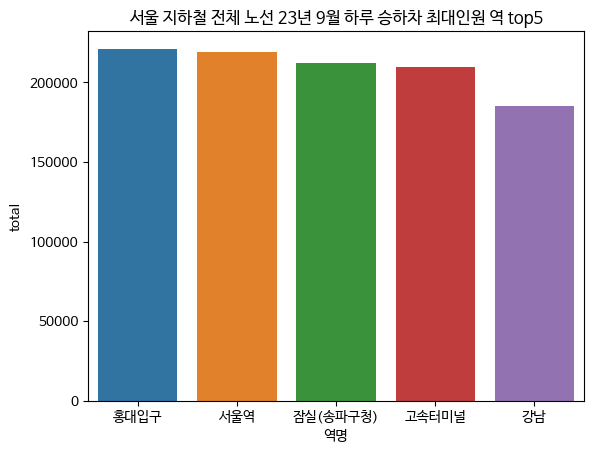

In [116]:
rideon_df = station_line_group_df2.groupby('역명').max('total').sort_values('total', ascending = False).head(5).reset_index()
sns.barplot(rideon_df, x = '역명', y = 'total').set(title = '서울 지하철 전체 노선 23년 9월 하루 승하차 최대인원 역 top5')

한 역에 여러 노선을 날짜별로 합쳐서 보니, 단일역으로는 홍대입구역이 최대인원!

3~4개 노선이 겹치는 서울역이 순위 치고 올라왔고, 2개 노선밖에 안겹치는 강남이 순위 내려옴.